## Trabajo práctico N°1

El sisitema de dos ecuaciones diferenciales ordinarias definido como:

$R'(t) = a\ R(t) - b\ R(t)\ F(t)$

$F'(t) = -c\ F(t) + d\ R(t)\ F(t)$

es conocido como **Modelo de predadores y prezas de Lotka-Volterra**. La función $R(t)$ modela el
número de conejos en un ecosistema dado, y $F(t)$ la cantidad de zorros en el mismo ecosistema.

**a)**  Usando el método de Runge-Kutta de cuarto orden, econtrá una solución numérica aproximada a dicho problema para el caso particular en que los parámetros toman los siguientes valores: $a = 0.1$, $b = 0.02$, $c = 3$ y $d = 0.01$, con un paso de integración $h = 0.05$, entre $t = 0$ y $t = 200$, para las condiciones iniciales $x(0) = 40$ y $y(0) = 9$.

Tomo $R(t) = x$, variable dependiente; y $F(t) = y$, variable dependiente.
Para integrar $R'(t) = a\ R(t) - b\ R(t)\ F(t)$, 
Dado que $a=0.1$ y $b=0.02$,   $R'(t) = 0.1\ R(t) - 0.02\ R(t)\ F(t)$

Luego, $f(x_i, y_{i}) = 0.1\ x_i - 0.02\ x_i y_i $

Para el caso de $F'(t) = -c\ F(t) + d\ R(t)\ F(t)$, también tomo $F(t) = y$, variable dependiente; y $R(t) = x$, variable dependiente.

Dado que $c=3$ y $d=0.01$,   $F'(t) = -3\ F(t) + 0.01\ R(t)\ F(t)$

Luego, $f(x_i, y_{i}) = -3\ y_i + 0.01\ x_i y_i $

Para resolverlas, voy a emplear el Método clásico de Runge-Kutta de cuarto orden:

$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h$

donde:

$k_1 = f(x_i, y_i)$

$k_2 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_1h)$

$k_2 = f(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_2h)$

$k_4 = f(x_i+h, y_i+k_3h)$

In [203]:
import matplotlib.pyplot as plt
import numpy as np
#https://mat.caminos.upm.es/wiki/Modelo_Depredador-Presa_de_Lotka-Volterra_(grupo_16)
class RungeKutta4:
    def __init__(self, x0, y0, h, t_start, t_end, funX, funY, *args):
        # Condiciones iniciales
        self.x0 = x0 
        self.y0 = y0
        self.h = h # Paso de integración
       # self.f = f # Función a integrar
        # Integrar desde t_start hasta t_end
        self.t_start = t_start  
        self.t_end = t_end
        ## Coeficientes k1, k2, k3, k4
        self.k1 = 0
        self.k2 = 0
        self.k3 = 0
        self.k4 = 0
        self.myargs = args
        self.fX = funX
        self.fY = funY
        self.graph = []
    def f(self, n):
        if(n == 1):
            return self.fX(*self.myargs)
        elif(n== 2):
            return self.fY(*self.myargs)
        
    
    def coefsK(self, x, y, h, n):
        # Calcula los coeficientes
        self.setXY(x,y)
        self.k1 = self.f(n)
        self.setXY(x+.5*self.h, y+.5*self.k1*self.h)
        self.k2 = self.f(n)
        self.setXY(x+.5*self.h, y+.5*self.k2*self.h)
        self.k3 = self.f(n)
        self.setXY(x+self.h, y+self.k3*self.h)
        self.k4 = self.f(n)
        
    def solve(self):
        
        t = self.t_start
        while(t <= self.t_end):
            self.coefsK(self.x0, self.y0, self.h, 1)
            temp_x0 = self.h/6*(self.k1 + 2*self.k2 + 2*self.k3 + self.k4)
            self.coefsK(self.x0, self.y0, self.h, 2)
            temp_y0 = self.h/6*(self.k1 + 2*self.k2 + 2*self.k3 + self.k4)
            
            ## update values
            self.x0 += temp_x0
            self.y0 += temp_y0
            
           ## print(i, self.y0)
            self.graph.append([t, self.x0, self.y0])
            t += self.h;
    
    def setXY(self, *args):
        self.myargs = args
        
    def plotXY_vs_t(self):
        g = np.array(self.graph)
        plt.figure(figsize=(15, 5))
        plt.plot(g[:,0], g[:,1], label="Conejos")
        plt.plot(g[:,0], g[:,2], label="Zorros")
        plt.xlabel("Tiempo [años]")
        plt.ylabel("Número de animales")
    
    def plotXvsY(self):
        g = np.array(self.graph)
        f = plt.figure(figsize=(15, 5))
        plt.plot(g[:,1], g[:,2])
        
        plt.xlabel("Número de conejos")
        plt.ylabel("Número de zorros")   
        plt.legend(loc='lower right')
        plt.show()
    

In [204]:
def ecuacionConejos(x, y):
    return 0.1*x-0.02*x*y
   
def ecuacionZorros(x, y):
    return -0.3*y+0.01*x*y
    
rk = RungeKutta4(x0=40, y0=9, h=0.05, t_start=0, t_end=200, funX=ecuacionConejos, funY=ecuacionZorros)
rk.solve()

**b)** Graficá, con los resultados del punto anterior, $R(t)$ y $F(t)$ en un mismo gráfico, entre $t = 0$ y $t = 200$, y comentá los resultados

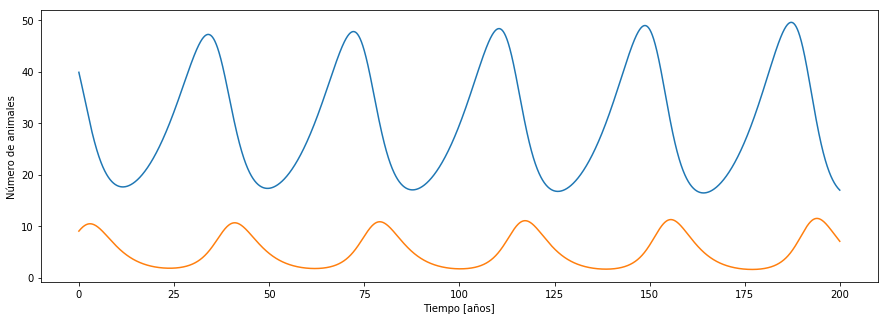

In [205]:
rk.plotXY_vs_t()

**c)** Graficá con los mismos resultados del punto **a)**, $R(t)$ vs. $F(t)$, y comtentá los resultados.


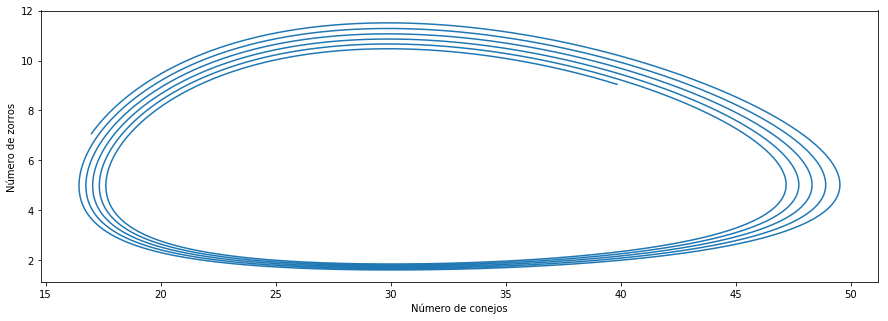

In [187]:
rk.plotXvsY()


**d)** Reflexioná sobre los significados biológicos de cada uno de los términos y coeficientes ($a$, $b$, $c$ y $d$) de las ecuaciones y analizá el diagrama de fase, con sus puntos fijos. Realizá un diagrama de flujo.